<a href="https://colab.research.google.com/github/samsoe/mpg_biomass/blob/master/Visualizations_Robel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

bigrquery [Documentation](https://www.rdocumentation.org/packages/bigrquery/versions/1.2.0)
* billing [documentation](https://github.com/r-dbi/bigrquery/issues/366)

This is an R Notebook.  An API key needs to be generated externally and uploaded for reasons.

# Gather Tools

In [0]:
# bigquery api access
install.packages("bigrquery")
install.packages("httpuv")
install.packages("googleAuthR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘gargle’, ‘rapidjsonr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(bigrquery)
library(httpuv)
library(tidyr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Database Connection

In [0]:
# BigQuery API Key
bq_auth(path = "/content/mpg-data-warehouse-34434e1a9914.json")

In [0]:
Sys.setenv(BIGQUERY_TEST_PROJECT = "mpg-data-warehouse")

In [0]:
billing <- bq_test_project()

In [0]:
con <- dbConnect(
  bigrquery::bigquery(),
  project = "mpg-data-warehouse",
  dataset = "horizontal_cover_robel",
  billing = billing
)

In [0]:
con

<BigQueryConnection>
  Dataset: mpg-data-warehouse.horizontal_cover_robel
  Billing: mpg-data-warehouse

In [0]:
dbListTables(con)

ERROR: ignored

# Combined

## Query Database

In [0]:
sql <- "SELECT 
           *
        FROM 
          `mpg-data-warehouse.vegetation_biomass.horizontal_cover_robel`"

In [0]:
tb <- bq_project_query(billing, sql)

In [0]:
robel = bq_table_download(tb)

In [0]:
class(robel)

[1] "tbl_df"     "tbl"        "data.frame"

## Format

In [0]:
# convert to data frame
robel <- as.data.frame(robel)

In [0]:
robel$year <- as.factor(robel$year)

In [0]:
robel$season <- as.factor(robel$season)

In [0]:
head(robel)

,grid_point,date,year,season,robel_avg
,<int>,<dttm>,<fct>,<fct>,<dbl>
1,121,2019-04-30,2019,spring,2.25
2,149,2019-04-30,2019,spring,2.75
3,122,2019-04-30,2019,spring,6.00
4,148,2019-04-30,2019,spring,11.00
5,26,2017-10-09,2017,fall,9.25
6,121,2017-10-09,2017,fall,12.25


## Display

### Spring

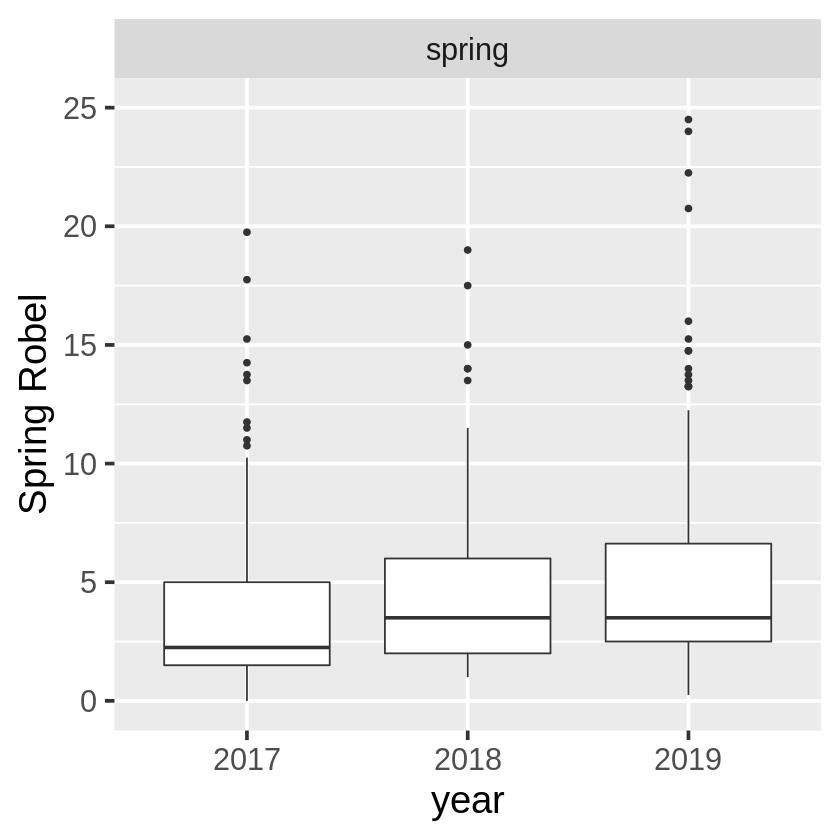

In [0]:
p <- ggplot(data = filter(robel, season == "spring")) +
  geom_boxplot(aes(x=year, y=robel_avg), na.rm=TRUE)

p +
  scale_y_continuous(name="Spring Robel", limits=c(0,25)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)

### Fall

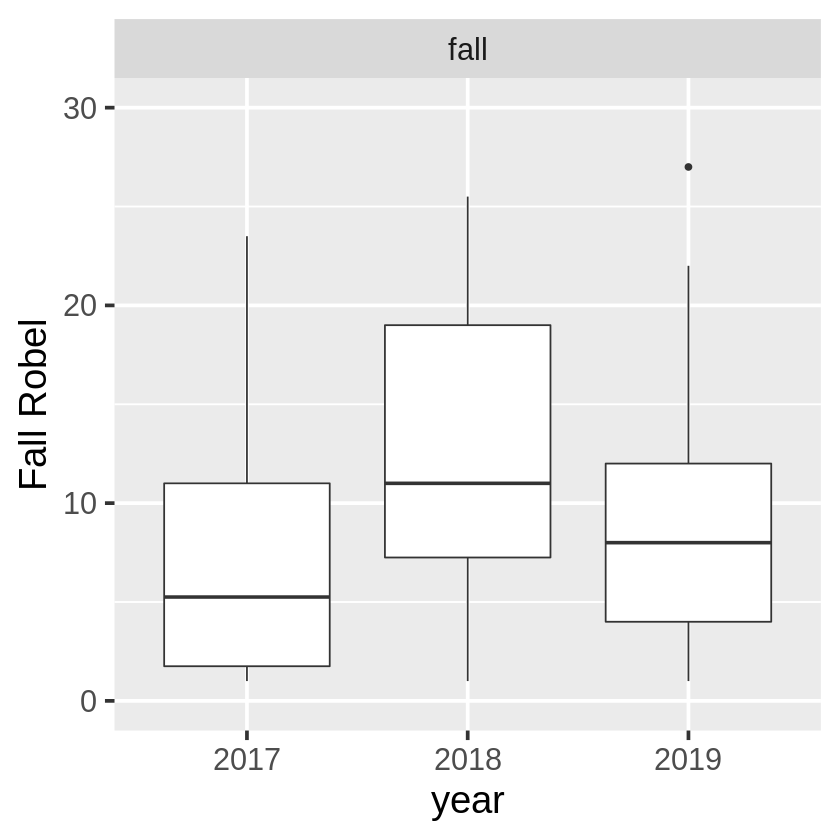

In [0]:
p <- ggplot(data = filter(robel, season == "fall")) +
  geom_boxplot(aes(x=year, y=robel_avg), na.rm=TRUE)

p +
  scale_y_continuous(name="Fall Robel", limits=c(0,30)) +
  theme_gray(base_size=23) +
  facet_wrap(~ season)